<center>
<h2>Capstone Project</h2>

# <span style='color: #81A5FF; '> ❔ Defining Personalities through a Predictive Model </span>

<h3> Group 4 </h3>

<span style='color: #081F4F; font-size: 18px;'>2023/2024</span>
</center>


---------

The following notebook concerns the manipulation of questionnaire data provided by ChatGPT in an effort to build a classifier able to predict which "Food Personality" a customer fits in, thus consisting of a typical Machine Learning pipeline.

<span style = 'font-size: 18px;'>
🍽 Importing Libraries and Integrating Data; <br>
🍽 Preliminary Exploration of the Data;<br>
🍽 Visualizing patterns; <br>
🍽 Building the Classifier and Evaluating it;<br>
</span>


---------

### 1. Importing Libraries and Integrating Data

In [73]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


> Firstly, we will extract the AI generated questionnaire answers, their augmentations and structure all of them together.

In [12]:
# #import from a public google drive
# from google.colab import drive
# drive.mount('/content/drive')


In [13]:
#Extracting the AI generated answers
answers = pd.DataFrame()
for personality in os.listdir('data/training_answers/original/'):
    personality_answer = pd.read_csv('data/training_answers/original/' + personality)
    personality_answer['personality'] = personality
    answers = pd.concat([answers,personality_answer])

In [14]:
answers

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients,personality
0,2,3,4,2,3,5,2,3,5,3,comfort_food_lover_responses.csv
1,1,2,3,1,2,4,1,2,4,2,comfort_food_lover_responses.csv
2,2,3,4,2,3,5,2,3,5,3,comfort_food_lover_responses.csv
3,3,2,3,3,2,4,1,4,4,2,comfort_food_lover_responses.csv
4,1,3,4,1,3,5,2,2,5,3,comfort_food_lover_responses.csv
...,...,...,...,...,...,...,...,...,...,...,...
16,5,3,4,4,3,4,5,3,3,3,the_adventurer_responses.csv
17,5,3,3,2,4,3,5,2,3,5,the_adventurer_responses.csv
18,5,4,3,3,3,3,5,3,4,4,the_adventurer_responses.csv
19,4,3,2,4,3,4,5,3,3,2,the_adventurer_responses.csv


In [15]:
#Extracting the augmented answers provided by AI content
answers_aug = pd.DataFrame()
for personality in os.listdir('data/training_answers/aug/'):
    personality_answer = pd.read_csv('data/training_answers/aug/' + personality)
    personality_answer['personality'] = personality
    answers_aug = pd.concat([answers_aug,personality_answer])

In [16]:
answers_aug

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients,personality
0,3,2,4,1,2,4,1,4,4,3,comfort_food_lover_responses_aug.csv
1,1,2,3,1,2,4,1,2,4,2,comfort_food_lover_responses_aug.csv
2,3,2,3,3,2,4,1,4,4,2,comfort_food_lover_responses_aug.csv
3,1,2,3,1,2,4,1,2,4,2,comfort_food_lover_responses_aug.csv
4,2,3,4,2,3,5,2,3,5,3,comfort_food_lover_responses_aug.csv
...,...,...,...,...,...,...,...,...,...,...,...
4995,5,4,3,3,3,3,5,4,4,4,the_adventurer_responses_aug.csv
4996,5,3,3,2,3,2,5,3,3,2,the_adventurer_responses_aug.csv
4997,4,3,3,4,3,4,5,3,3,4,the_adventurer_responses_aug.csv
4998,5,3,3,5,3,3,5,3,2,3,the_adventurer_responses_aug.csv


In [17]:
#Joining the two datasets
total_answers = pd.concat([answers,answers_aug])

In [18]:
total_answers.reset_index(inplace=True, drop=True)

In [19]:
#Putting the personality classes in a more readable format
personality_mapping_names = {}
for personality in list(total_answers['personality'].unique()):
    name = personality.split('_')[:-1]
    name_clean = []
    for section in name:
        section = section.capitalize()
        if section != 'Responses':
            name_clean.append(section)
    name_clean = ' '.join(name_clean)
    personality_mapping_names[personality] = name_clean
total_answers['personality'] = total_answers['personality'].map(personality_mapping_names)

In [23]:
# Export the total_answers to a CSV file to introduce them to ChatGPT and generate some noisy observations
total_answers.to_csv('data/training_answers/total_answers', index=False)

In [31]:
# Import the data with additional noise introduced to the answers by ChatGPT
final_answers = pd.read_csv('data/training_answers/perturbed_total_answers.csv')

### 2. Preliminary Exploration of the data through the analysis of Summary Statistics

In [34]:
final_answers['personality'].value_counts()

personality
Comfort Food Lover         5021
Conscious Eater            5021
Fine Dining Connoisseur    5021
Low Cost Foodie            5021
The Adventurer             5021
Name: count, dtype: int64

> We find that our data is perfectly balanced, making it appropriate to examine metrics such as the accuracy.

In [35]:
final_answers.describe()

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients
count,25105.000000,25105.000000,25105.000000,25105.000000,25105.00000,25105.000000,25105.000000,25105.000000,25105.000000,25105.000000
mean,2.945389,3.098865,3.126987,2.871938,3.29038,3.255885,3.051504,3.477514,3.040829,3.202828
std,1.537145,1.529670,1.529912,1.515972,1.48799,1.501356,1.534529,1.455270,1.524355,1.511972
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,4.000000,5.000000,5.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [40]:
final_answers.groupby('personality').median()

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients
personality,,,,,,,,,,
Comfort Food Lover,2.0,3.0,4.0,2.0,2.0,4.0,2.0,3.0,5.0,2.0
Conscious Eater,4.0,3.0,3.0,3.0,4.0,4.0,2.0,4.0,3.0,4.0
Fine Dining Connoisseur,3.0,5.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0,4.0
Low Cost Foodie,2.0,2.0,5.0,2.0,3.0,3.0,2.0,4.0,3.0,2.0
The Adventurer,5.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0


> We also find that, in median terms, it is already possible to view some distinctions within clients' answers depending on their assigned personality. For example, Comfort food lovers appreciate more traditional food and home made meals, being less propense to trying exotic foods or experience new culinary items. On the other hand, Conscious Eaters are more willing to spend more on high-quality ingredients and interested in nutritial content in comparison to the remaining personalities.

In [102]:
final_answers.isnull().any()

Willingness to Try Exotic Foods                     False
Importance of Food Presentation                     False
Value for Money in Meals                            False
Preference for Gourmet Restaurants                  False
Interest in Nutritional Content                     False
Frequency of Eating Home-Cooked Meals               False
Desire for New Culinary Experiences                 False
Preference for Organic or Diet-Specific Foods       False
Enjoyment of Traditional or Familiar Foods          False
Willingness to Spend on High-Quality Ingredients    False
personality                                         False
dtype: bool

> Since there are no missing values, it is not necessary to perform any kind of imputations.

In [105]:
final_answers[final_answers.duplicated()]

,Willingness to Try Exotic Foods,Importance of Food Presentation,Value for Money in Meals,Preference for Gourmet Restaurants,Interest in Nutritional Content,Frequency of Eating Home-Cooked Meals,Desire for New Culinary Experiences,Preference for Organic or Diet-Specific Foods,Enjoyment of Traditional or Familiar Foods,Willingness to Spend on High-Quality Ingredients,personality
748,1,5,2,1,2,3,1,5,5,5,Comfort Food Lover
999,2,4,4,2,3,5,1,3,5,1,Comfort Food Lover
1313,1,1,2,1,1,5,3,4,5,1,Comfort Food Lover
1480,4,2,5,4,2,5,3,5,5,1,Comfort Food Lover
1675,1,4,5,4,4,5,3,5,5,2,Comfort Food Lover
...,...,...,...,...,...,...,...,...,...,...,...
23590,5,1,5,4,2,1,4,2,4,2,The Adventurer
23718,5,4,2,1,1,2,5,5,3,4,The Adventurer
23819,5,2,4,1,4,2,5,1,5,3,The Adventurer
23896,5,2,1,1,3,2,5,1,1,3,The Adventurer


> There are also a few duplicated observations. However, since these represent answers per customer, and there may be customers with equal answers, the duplicates will be kept.

### 3. Visualization

> Firstly let's understand how do the answers to the questionnaire typically correlate to eachother.

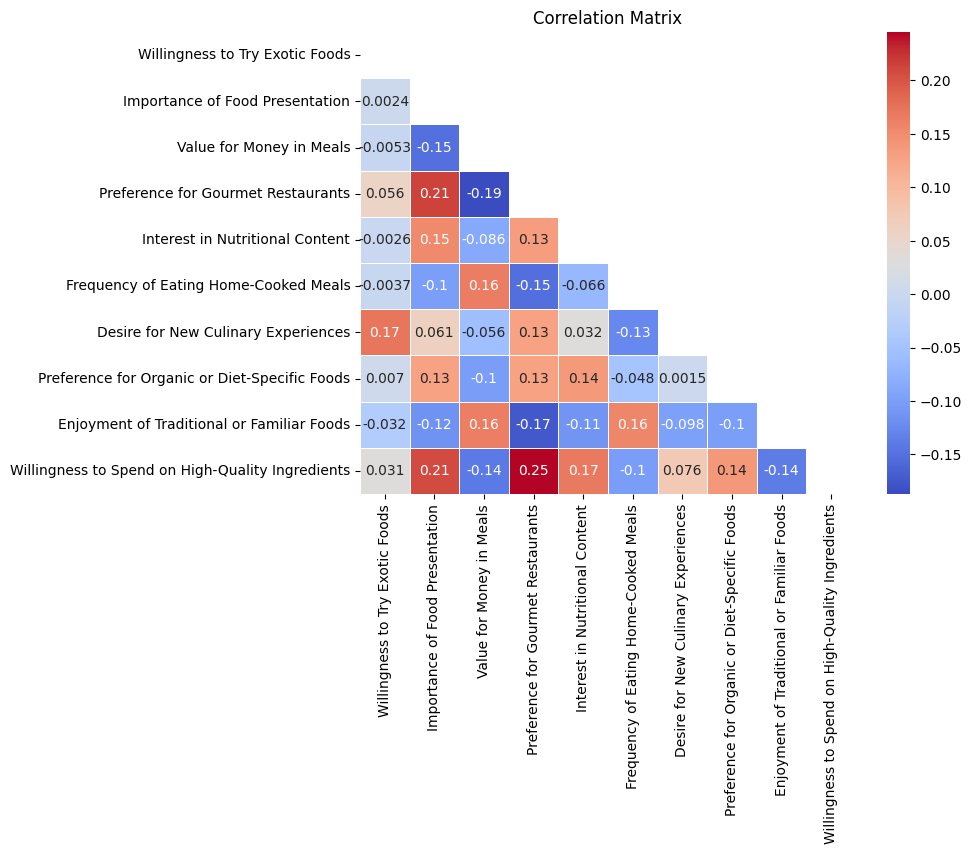

In [43]:
correlation_matrix = final_answers.drop('personality', axis=1).corr(method='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation between Questionnaire Answers")
plt.show()

> It appears that there are several factors that typically are found together, namely the preference for gourmet restaurants, the importance given to the presentation of a meal and the willingness to spend on high quality ingredients. Moreover, it seems that clients who prefer home-cooked meals are not so enthusiastic of new culinary experiences, while the preference for gourmet restaurants typically implies less preoccupation with the monetary value of the meal.

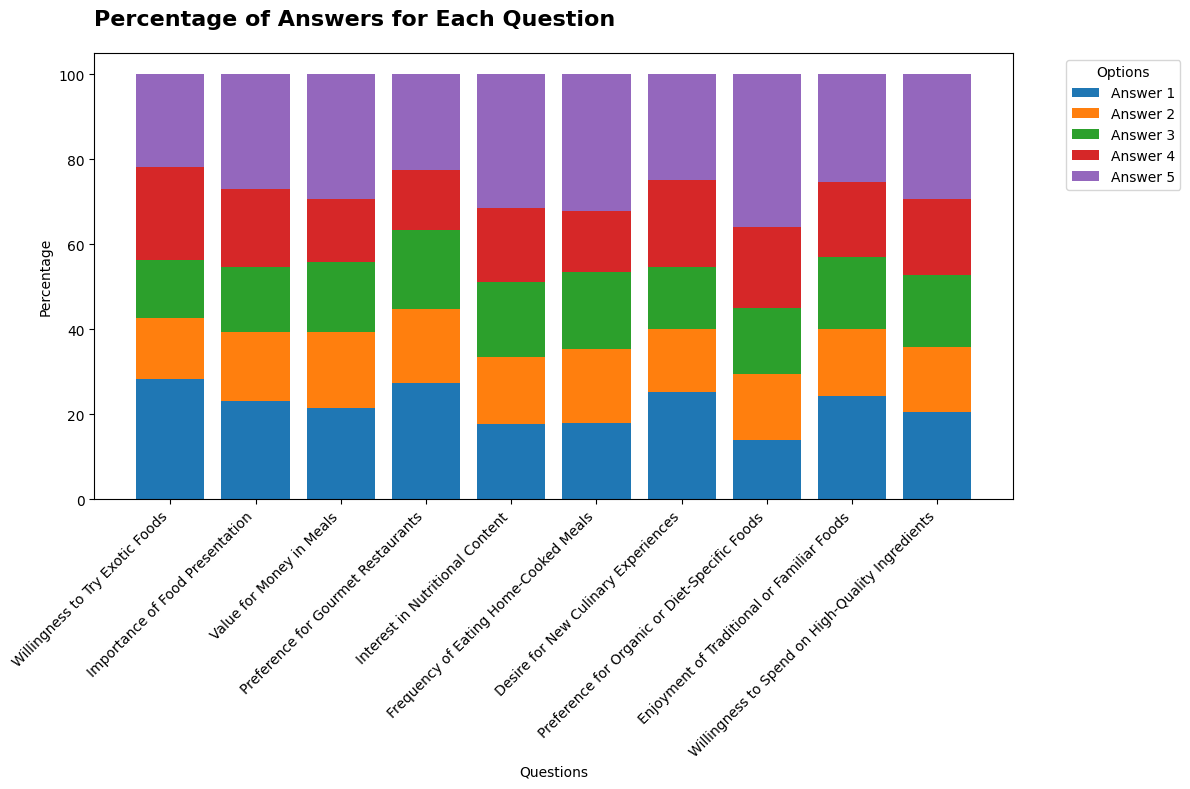

In [46]:
rating_counts = final_answers.drop('personality', axis=1).apply(pd.Series.value_counts)

total_responses = final_answers.drop('personality', axis=1).count()

feature_percentages = (rating_counts / total_responses) * 100

feature_percentages = feature_percentages.T

feature_percentages.fillna(0, inplace=True)

plt.figure(figsize=(12, 8))

bottoms_corrected = pd.Series([0]*len(feature_percentages), index=feature_percentages.index)

for column in feature_percentages.columns:
    plt.bar(feature_percentages.index, feature_percentages[column], 
            bottom=bottoms_corrected, label=f'Answer {column}')
    bottoms_corrected += feature_percentages[column]

plt.title('Percentage of Answers for Each Question', fontsize=16, fontweight='bold', pad=20, loc='left')
plt.xlabel('Questions')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Options', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

> Interpretação

In [49]:
melted = pd.melt(final_answers, id_vars='personality', value_name='Answer', var_name='Question')

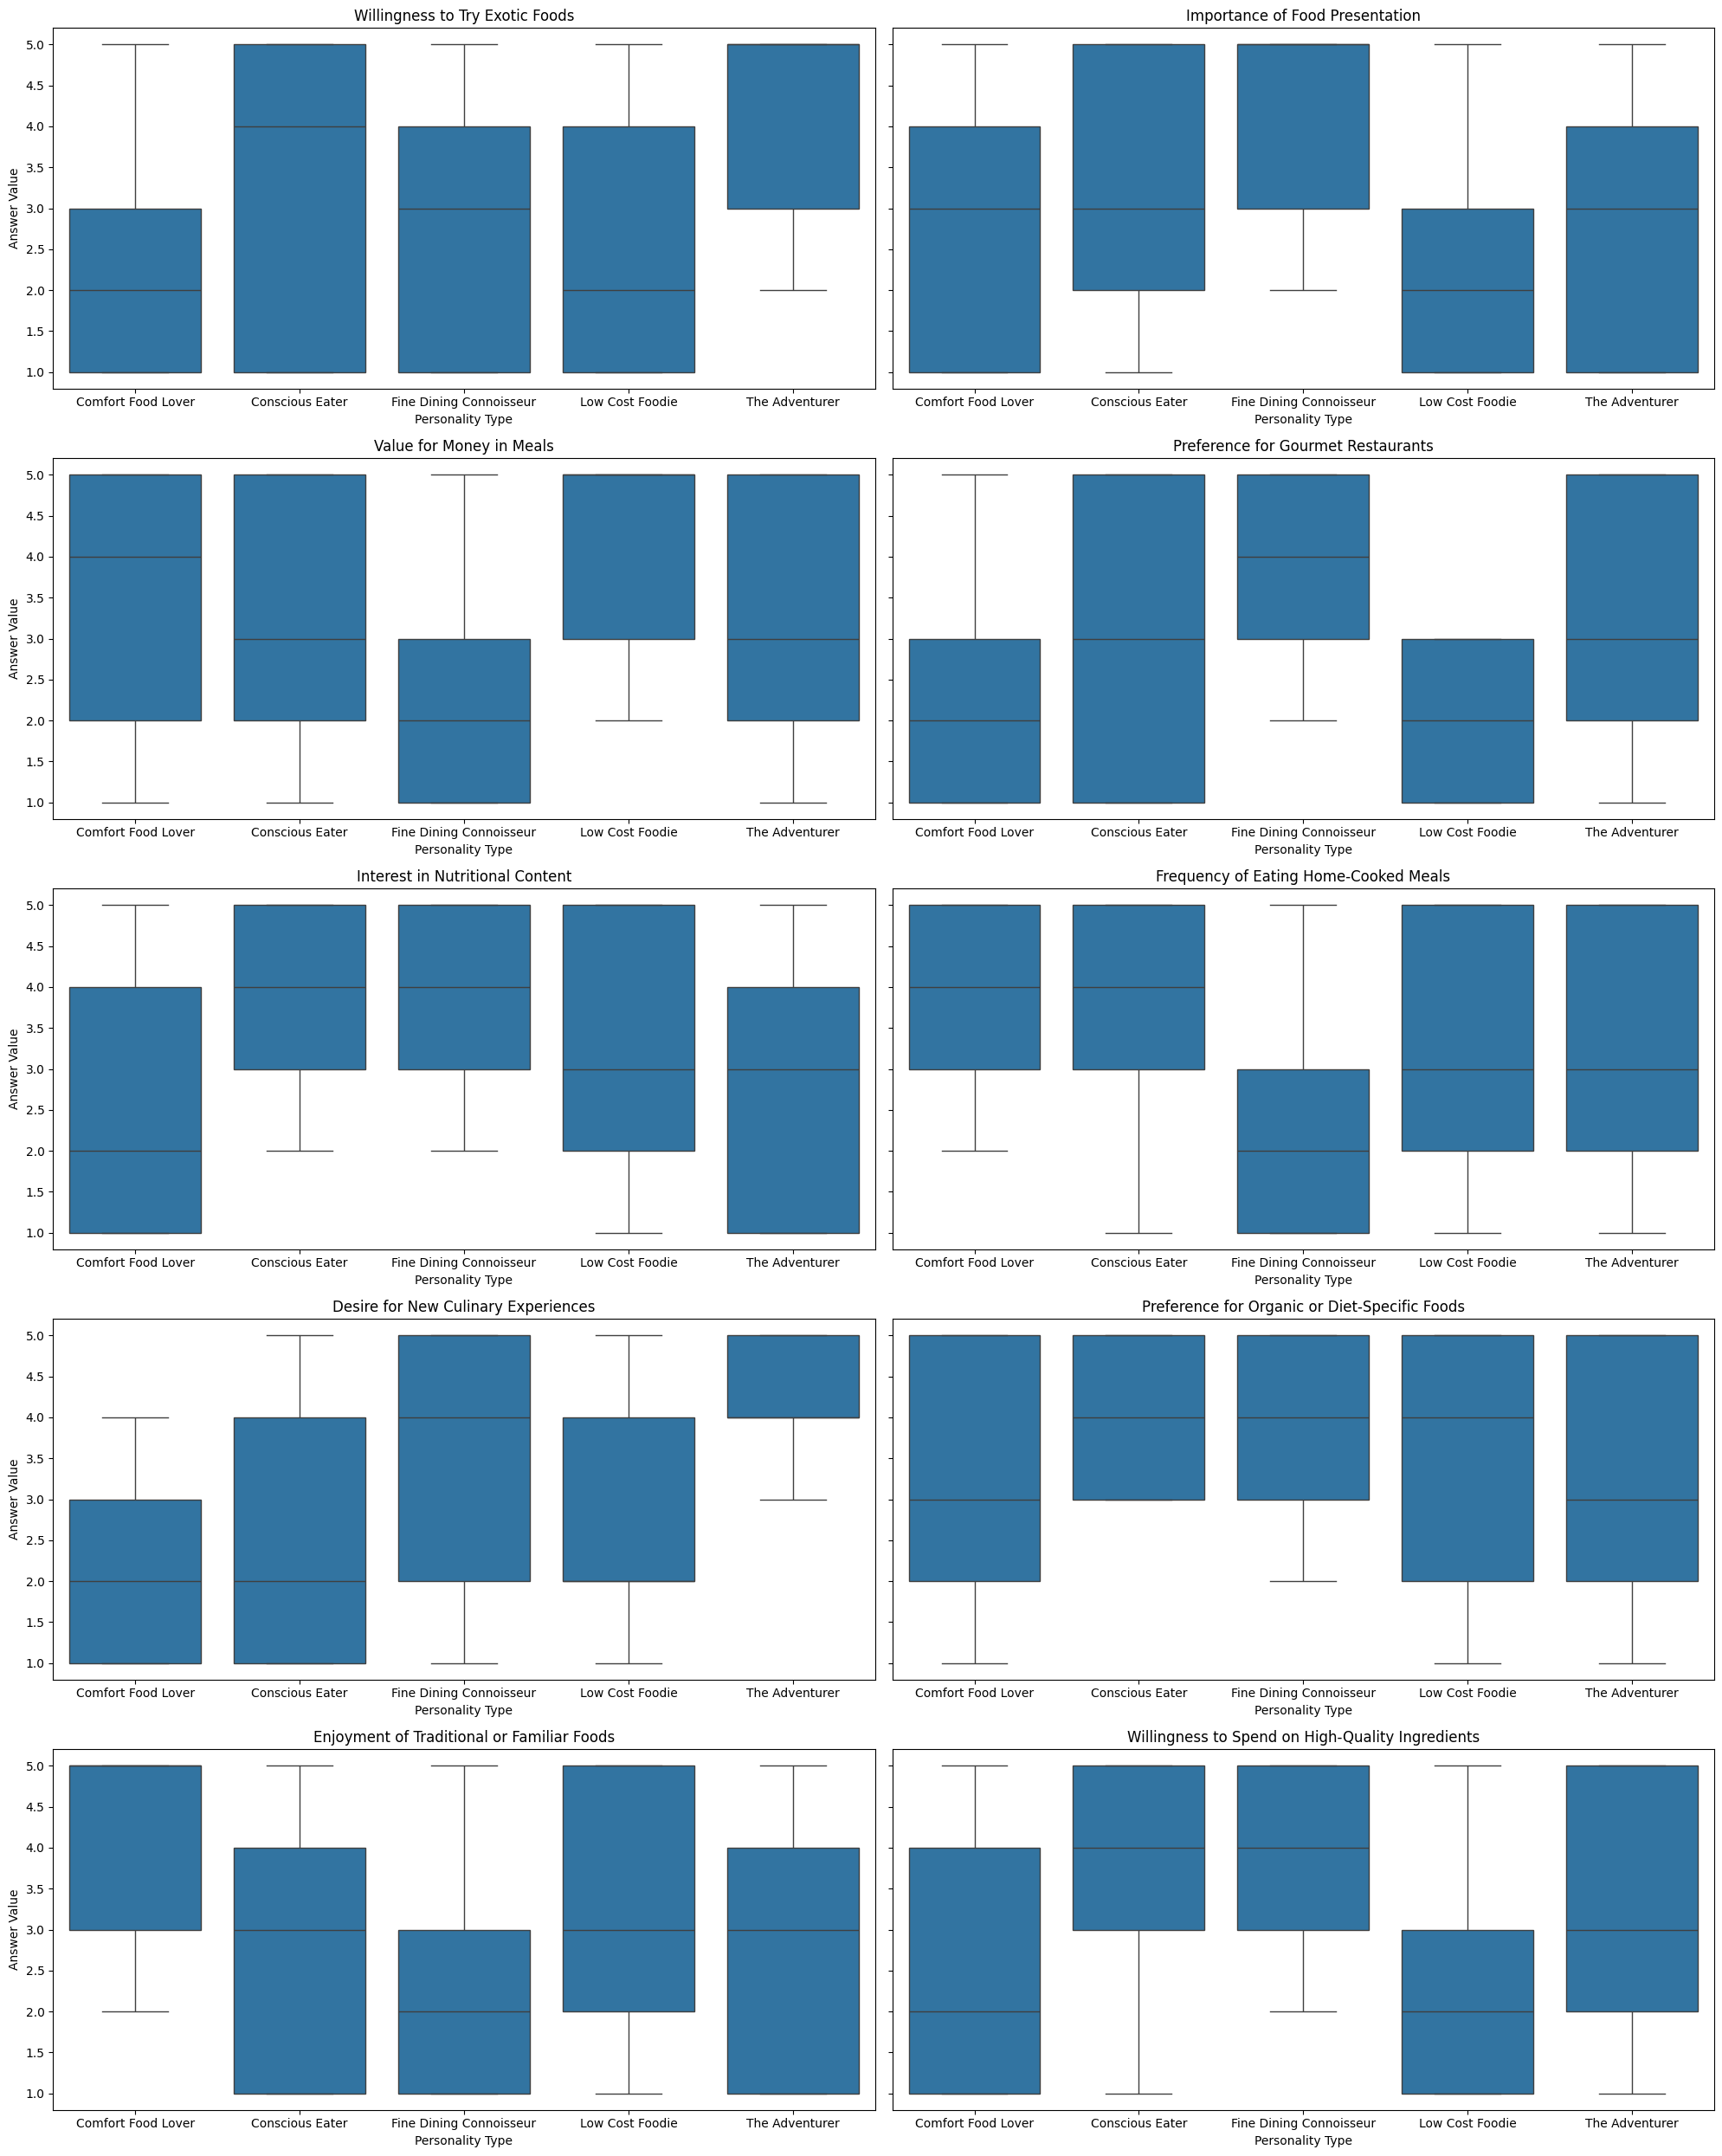

In [66]:
questions = list(melted['Question'].unique())

fig, axes = plt.subplots(5, 2, figsize=(20, 25), sharey=True)
axes = axes.flatten()

for i in range(0, len(questions) ):
    ax = axes[i]
    sns.boxplot(data=melted[melted['Question'] == f'{questions[i]}'], x='personality', y='Answer', ax=ax)
    ax.set_title(f'{questions[i]}')
    ax.set_xlabel('Personality Type')
    ax.set_ylabel('Answer Value')

plt.tight_layout()

plt.show()

### 4. Building the Predictive Model and Evaluating it

> Let's first separate the target variable from the features.

In [71]:
X = final_answers.drop('personality', axis=1)
y = final_answers['personality']

> To evaluate the model consistently, K-Fold cross-validation will be used.

In [100]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_val_scores = []
accuracy_train_scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
     print(f" -----------  Training for Fold {i} ----------- ")
     X_train, X_val = X.iloc[train_index], X.iloc[test_index]
     y_train, y_val = y.iloc[train_index], y.iloc[test_index]
     rf = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42, min_samples_leaf=10, criterion='gini')
     rf.fit(X_train, y_train)
     y_train_pred = rf.predict(X_train)
     y_val_pred = rf.predict(X_val)
     accuracy_val_scores.append(accuracy_score(y_val, y_val_pred))
     accuracy_train_scores.append(accuracy_score(y_train, y_train_pred))
     print(f"Train Accuracy Score: {accuracy_train_scores[i]}")
     print(f"Validation Accuracy Score: {accuracy_val_scores[i]}")
     print(f"Classification Report: \n {classification_report(y_val, y_val_pred)}")
print(f"Average Training Accuracy Score: {np.mean(accuracy_train_scores)}")
print(f"Average Validation Accuracy Score: {np.mean(accuracy_val_scores)}")

 -----------  Training for Fold 0 ----------- 
Train Accuracy Score: 0.8433081059549891
Validation Accuracy Score: 0.8109938259310894
Classification Report: 
                          precision    recall  f1-score   support

     Comfort Food Lover       0.85      0.78      0.81      1027
        Conscious Eater       0.77      0.80      0.78      1025
Fine Dining Connoisseur       0.84      0.88      0.86      1028
        Low Cost Foodie       0.80      0.83      0.81       973
         The Adventurer       0.80      0.77      0.79       968

               accuracy                           0.81      5021
              macro avg       0.81      0.81      0.81      5021
           weighted avg       0.81      0.81      0.81      5021

 -----------  Training for Fold 1 ----------- 
Train Accuracy Score: 0.8447520414260108
Validation Accuracy Score: 0.7962557259510058
Classification Report: 
                          precision    recall  f1-score   support

     Comfort Food Lover     

> Now that we found a moderately-accurate model, with approximately, and on average, an 80% of accuracy in the validation set, let's examine the confusion matrix of the last fold's validation predictions to get a better understanding of which classes the model is able to capture best.

In [109]:
classes = list(y.unique())
matrix = confusion_matrix(y_val, y_val_pred)
row_totals = matrix.sum(axis=1)
matrix_percentages = matrix / row_totals[:, None] * 100 
#Create DataFrames from the confusion matrices
df_confusion = pd.DataFrame(matrix, index=classes, columns=classes)
df_percentages = pd.DataFrame(matrix_percentages, index=classes, columns=classes)
annotations = df_confusion.astype(str) + "\n" + df_percentages.round(2).astype(str) + "%"

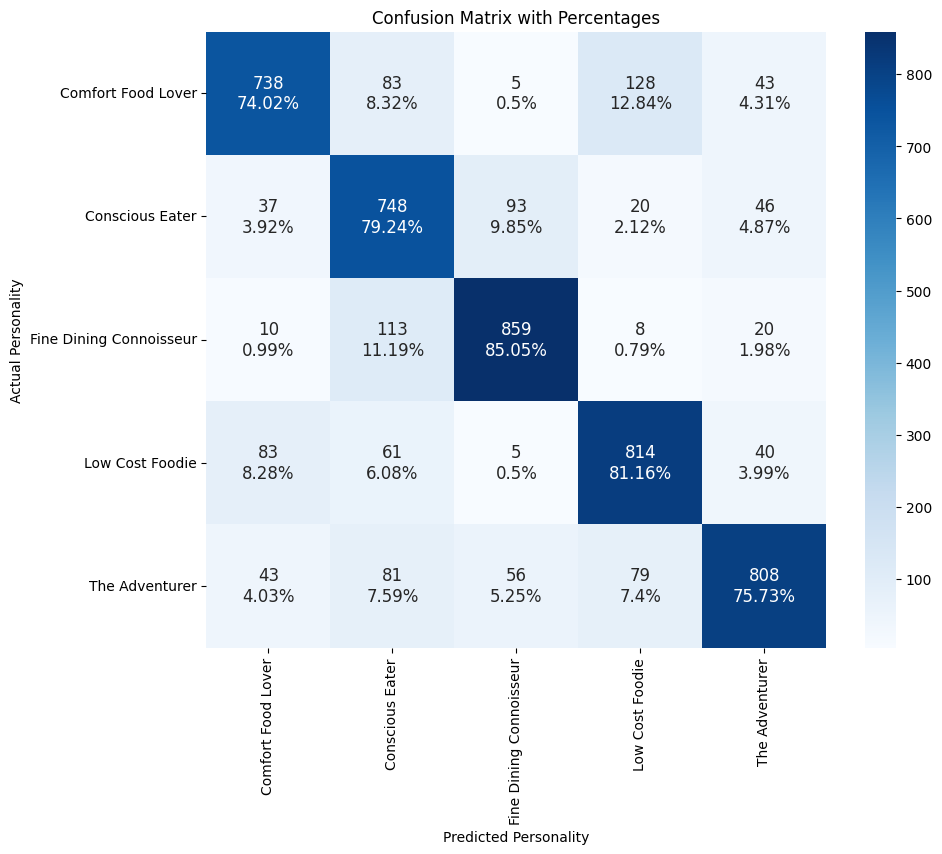

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=annotations, fmt='', cmap='Blues', annot_kws={"size": 12}, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Personality')
plt.ylabel('Actual Personality')
plt.title('Confusion Matrix with Percentages')
plt.show()

> It appears that the model is being able to capture relatively well the distinction between different personalities, performing less accurately for observations within "Comfort Food Lover" personality, often confusing it with "Low Cost Foodies". 

### 5. Training and Saving the final model for Future Predictions

> Now that the model's parameters are defined, it will be trained on the entire data and saved for future predictions.

In [111]:
rf = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42, min_samples_leaf=10, criterion='gini')
rf.fit(X, y)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=150,
                       random_state=42)

In [112]:
with open('personality_classification_model.pkl', 'wb') as f:
    pickle.dump(rf, f)